In [2]:
# import data from data.json
import json
import os
import pandas as pd
import polyline
import folium
import matplotlib as plt
import numpy as np
import calmap

with open('data.json', 'r') as f:
    data = json.load(f)


In [3]:
print(len(data))

725


In [160]:
#calmap.calendarplot(data)
activities = pd.json_normalize(data)

In [161]:
# convert start_date from string to datetime and set as index
activities.index = pd.to_datetime(activities['start_date_local']).values


In [163]:
daily_distance = activities['distance'].resample('D').sum() / 1000
daily_distance = daily_distance.fillna(0)


In [164]:
daily_distance

2020-11-07     7.1007
2020-11-08     0.0000
2020-11-09     0.0000
2020-11-10     4.9417
2020-11-11     8.8243
               ...   
2023-08-25    17.1167
2023-08-26     6.5380
2023-08-27     0.0000
2023-08-28    19.8823
2023-08-29     7.0380
Freq: D, Name: distance, Length: 1026, dtype: float64

<Axes: >

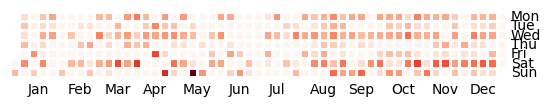

In [166]:
calmap.yearplot(daily_distance, year=2022)

In [14]:
for count, activity in enumerate(data):
    print(count, activity['name'], round(activity['distance']/1000), "total km")

0 Morning Run 5 total km
1 Afternoon Run 3 total km
2 Afternoon Run 4 total km
3 Afternoon Run 17 total km
4 Afternoon Run 12 total km
5 Afternoon Run 1 total km
6 Lunch Run 14 total km
7 Afternoon Run 17 total km
8 Morning Run 6 total km
9 Afternoon Run 11 total km
10 Lunch Run 11 total km
11 Afternoon Run 11 total km
12 Evening Run 1 total km
13 Afternoon Run 20 total km
14 Afternoon Run 18 total km
15 Afternoon Run 10 total km
16 Lunch Run 13 total km
17 Afternoon Run 20 total km
18 Fuld blæs på skummaskinen🌪️💦 12 total km
19 Morning Run 5 total km
20 Lang søndag inkl. 2 x 3km tempo 31 total km
21 Afternoon Run 14 total km
22 Inkl. 30 min sauna💆🏻‍♂️ 10 total km
23 Evening Squash 0 total km
24 Afternoon Run 23 total km
25 Afternoon Run 6 total km
26 Lunch Run 17 total km
27 Afternoon Run 12 total km
28 Morning Run 21 total km
29 Afternoon Run 11 total km
30 Afternoon Run 21 total km
31 Afternoon Run 8 total km
32 Lunch Run 18 total km
33 Afternoon Run 11 total km
34 Morning Run 22 to

In [17]:
data[0]["map"]["summary_polyline"]

'_nzrIudpkAb@eDv@uDPo@f@{DNwANiABG\\O^Eb@?b@Dh@V`Ap@`@Lb@HLHTFp@f@VLVFPHv@Ll@PV@JJbAPxAh@n@\\j@DLHPDb@BJDDFR?`@NANLpAUEDFFa@DGVBF?l@QH?t@Fl@Ph@TJ@TLx@Tb@Pr@NdAf@NPBH?`@SvC?p@OnAApBGt@I~AId@BXMlAEfAWtBE|@Gb@I|BQjA?TI|@GpABv@An@I\\a@jACr@@`AI`A@JLZPFBDDj@C^W|AKb@INSb@OPwG~Dc@\\_@f@a@Xu@r@]j@]|AQ`@Q\\Mz@@\\Tn@BP@v@HZTP\\Hf@DNJRt@N\\Fx@C|AUlBK`@SDGHBV?RCR?^KhA?l@JVFD^HNAPFb@IVSf@IPMD?VRPH\\DHF\\t@@b@G`@Sf@I`@GPIH_@|@KxABXP`@PLh@Dz@?h@JFAROBILOPIVIb@ENMJUFi@@y@Eu@@_@SwA?i@Fm@AGJWh@]FId@cAHUL_ADgBPYTSXi@@k@D_@D{BFmAJm@D_AGa@[_AE[IUCe@Sy@QeAo@yBG_@[kAOQYy@w@aBKu@Co@BaAEu@@g@GsAWg@IEy@Mk@Oi@EUIUAk@Qk@?EGAIKKk@QO?_@K_@Iu@E]Bi@GoBIWIc@U[CCCAMOc@CGIGQ^GBg@MQMOUCSUg@a@]e@dAMHG@g@UYSKJo@AUKK?AABEACSASE'

In [23]:
# visualise with leaflet and Streamlit


In [25]:
activities = pd.json_normalize(data)
activities['polyline_decoded']=activities['map.summary_polyline'].apply(polyline.decode)

In [57]:
activities['pace(min/km)'] = round((activities['moving_time']/60)/activities['distance']*1000,2)

In [58]:
example = activities.iloc[0]

# plot map 
m = folium.Map(location=[np.mean(example['polyline_decoded'], axis=0)[0], np.mean(example['polyline_decoded'], axis=0)[1]], zoom_start=14)
folium.PolyLine(example['polyline_decoded'], color="green").add_to(m)
display(m)

In [59]:
example

resource_state                                                                   2
name                                                                   Morning Run
distance                                                                    5272.5
moving_time                                                                   1563
elapsed_time                                                                  1673
total_elevation_gain                                                          10.0
type                                                                           Run
sport_type                                                                     Run
workout_type                                                                   NaN
id                                                                      9734779118
start_date                                                    2023-08-28T06:25:35Z
start_date_local                                              2023-08-28T08:25:35Z
time